<a href="https://colab.research.google.com/github/manan152003/dphi-colab/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import shutil

import tensorflow as tf

## Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dphi (Colab Books)/eye_gender_data.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


# Preprocessing the data and making two different classes from csv file

In [ ]:
train_csv = pd.read_csv(r'/tmp/eye_gender_data/Training_set.csv')

train_dir = r'/tmp/eye_gender_data/train'
train_labels_dir = r'/tmp/egd'
if not os.path.exists(train_labels_dir):
  os.mkdir('/tmp/egd')

for filename, class_name in train_csv.values:
  if not os.path.exists(train_labels_dir +  '/' + str(class_name)):
    os.mkdir(train_labels_dir + '/'  + str(class_name))
  src_path = train_dir + '/' + filename
  dst_path = train_labels_dir + '/' +  str(class_name) + '/' + filename
  try:
    shutil.move(src_path, dst_path)
    print("successfull")
  except IOError as e:
    print(f"unable to copy file {src_path} to {dst_path}")
  except:
    print(f'when try copy {src_path()} to {dst_path}, unexpected error: {sys.exc_info()}')

Streaming output truncated to the last 5000 lines.
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
successfull
s

# Generator

In [ ]:
train_root = '/tmp/egd'
test_root = '/tmp/eye_gender_data/test'

batch_size = 32
img_height = 256
img_width = 256

train_data = tf.keras.utils.image_dataset_from_directory(
    directory=train_root,
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=batch_size,
    image_size=(img_height,img_width))

val_data = tf.keras.utils.image_dataset_from_directory(
  directory=train_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 9220 files belonging to 2 classes.
Using 7376 files for training.
Found 9220 files belonging to 2 classes.
Using 1844 files for validation.


In [ ]:
class_names = train_data.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['female', 'male']
2


# Visualizing data

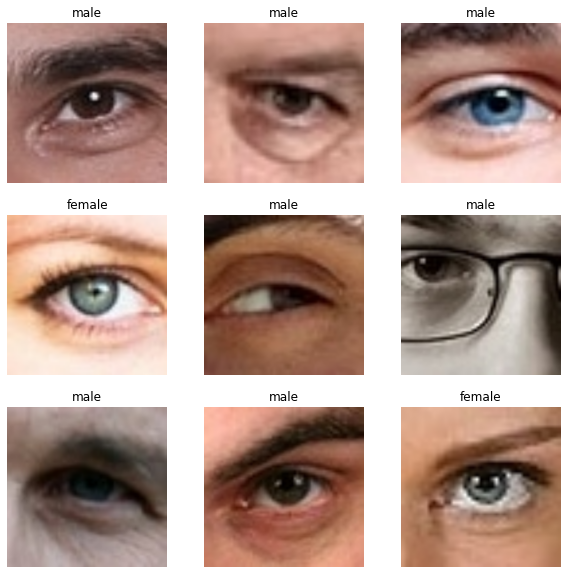

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


# Making a CNN model

In [ ]:
# define sequential model
model = tf.keras.Sequential()

# define conv-pool layers - set 1
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D())

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D())
# define conv-pool layers - set 3
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(tf.keras.layers.MaxPooling2D())

#add flatten layer
model.add(tf.keras.layers.Flatten())

#add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

#add output layer
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))

#compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

# Training Model

In [ ]:
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss', restore_best_weights=True, verbose=1)

history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, callbacks=[es_callback], batch_size=32, verbose=1)

Epoch 1/100
231/231 [==============================] - 511s 2s/step - loss: 0.1929 - accuracy: 0.9230 - val_loss: 0.2562 - val_accuracy: 0.8975
Epoch 2/100
231/231 [==============================] - 505s 2s/step - loss: 0.1863 - accuracy: 0.9271 - val_loss: 0.2672 - val_accuracy: 0.8926
Epoch 3/100
231/231 [==============================] - 506s 2s/step - loss: 0.1715 - accuracy: 0.9318 - val_loss: 0.2540 - val_accuracy: 0.8986
Epoch 4/100
231/231 [==============================] - 505s 2s/step - loss: 0.1623 - accuracy: 0.9340 - val_loss: 0.2484 - val_accuracy: 0.9078
Epoch 5/100
231/231 [==============================] - 502s 2s/step - loss: 0.1321 - accuracy: 0.9502 - val_loss: 0.2448 - val_accuracy: 0.9094
Epoch 6/100
231/231 [==============================] - 503s 2s/step - loss: 0.1157 - accuracy: 0.9527 - val_loss: 0.2655 - val_accuracy: 0.9094
Epoch 7/100
231/231 [==============================] - 503s 2s/step - loss: 0.1061 - accuracy: 0.9595 - val_loss: 0.2877 - val_accuracy:

# Visualizing results

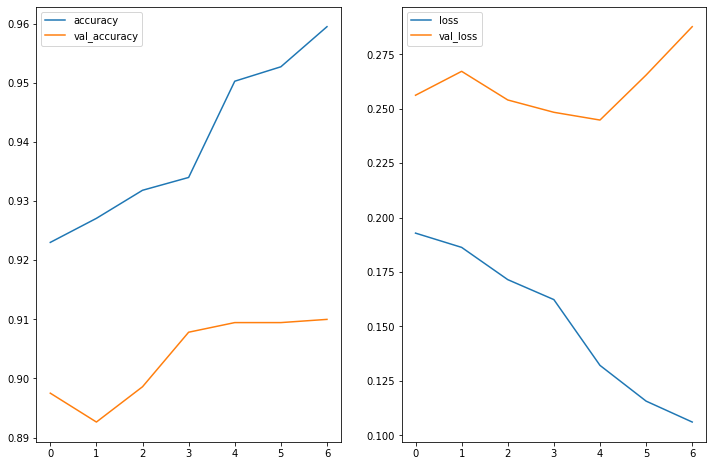

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[0])
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[1])

# Testing on test dataset

In [ ]:
test_csv = pd.read_csv(r'/tmp/eye_gender_data/Testing_set.csv')
test_dir = '/tmp/eye_gender_data/test'
df = []
for filename in test_csv.values:
  img = tf.keras.utils.load_img(
      test_dir + '/' + filename[0], target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predictions_labels = np.argmax(predictions)
  print(f'{filename[0]} belongs to {class_names[predictions_labels]}')
  df.append({'label': class_names[predictions_labels]})

pd.DataFrame(df).to_csv('Submission.csv', index=False)


1/1 [==============================] - 0s 62ms/step
Image_1.jpg belongs to male
1/1 [==============================] - 0s 60ms/step
Image_2.jpg belongs to male
1/1 [==============================] - 0s 59ms/step
Image_3.jpg belongs to male
1/1 [==============================] - 0s 61ms/step
Image_4.jpg belongs to male
1/1 [==============================] - 0s 62ms/step
Image_5.jpg belongs to male
1/1 [==============================] - 0s 69ms/step
Image_6.jpg belongs to male
1/1 [==============================] - 0s 60ms/step
Image_7.jpg belongs to female
1/1 [==============================] - 0s 62ms/step
Image_8.jpg belongs to female
1/1 [==============================] - 0s 62ms/step
Image_9.jpg belongs to male
1/1 [==============================] - 0s 50ms/step
Image_10.jpg belongs to female
1/1 [==============================] - 0s 47ms/step
Image_11.jpg belongs to female
1/1 [==============================] - 0s 46ms/step
Image_12.jpg belongs to male
1/1 [========================